In [1]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn

from platform import python_version
from ydata_profiling import ProfileReport

from src.config import DADOS_ORIGINAIS, DADOS_LIMPOS, RELATORIO
from src.graficos import PALETTE

sns.set_theme(palette="viridis")

#pandas configurando para mostrar todas as linhas e colunas
pd.set_option ('display.max_columns', None)
#configurando pandas para não mostrar notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)


bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")

Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.2
NumPy                |     1.26.4
Pandas               |      2.2.3
Scikit-Learn         |      1.5.1
Seaborn              |     0.13.2

Versão do Python: 3.12.3


In [2]:
# Carregamento e preparação dos dados
df = pd.read_csv(DADOS_ORIGINAIS)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.87,40.34,0.01,0.03,0.03,0.01,0.02,0.00,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.02,45.49,0.00,0.02,0.03,0.01,0.01,0.00,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.61,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.36,45.19,0.01,0.03,0.04,0.01,0.02,0.00,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [5]:
df.describe(exclude="number")

,diagnosis
count,569
unique,2
top,B
freq,357


In [6]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
df["diagnosis"].value_counts(normalize=True)

diagnosis
B   0.63
M   0.37
Name: proportion, dtype: float64

In [8]:
df[df.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [9]:
df[df.duplicated("id")]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [10]:
df = df.drop(columns=["id"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
df = df.reindex(sorted(df.columns), axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_mean                569 non-null    float64
 1   area_se                  569 non-null    float64
 2   area_worst               569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   compactness_se           569 non-null    float64
 5   compactness_worst        569 non-null    float64
 6   concave points_mean      569 non-null    float64
 7   concave points_se        569 non-null    float64
 8   concave points_worst     569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  concavity_worst          569 non-null    float64
 12  diagnosis                569 non-null    object 
 13  fractal_dimension_mean   569 non-null    float64
 14  fractal_dimension_se     5

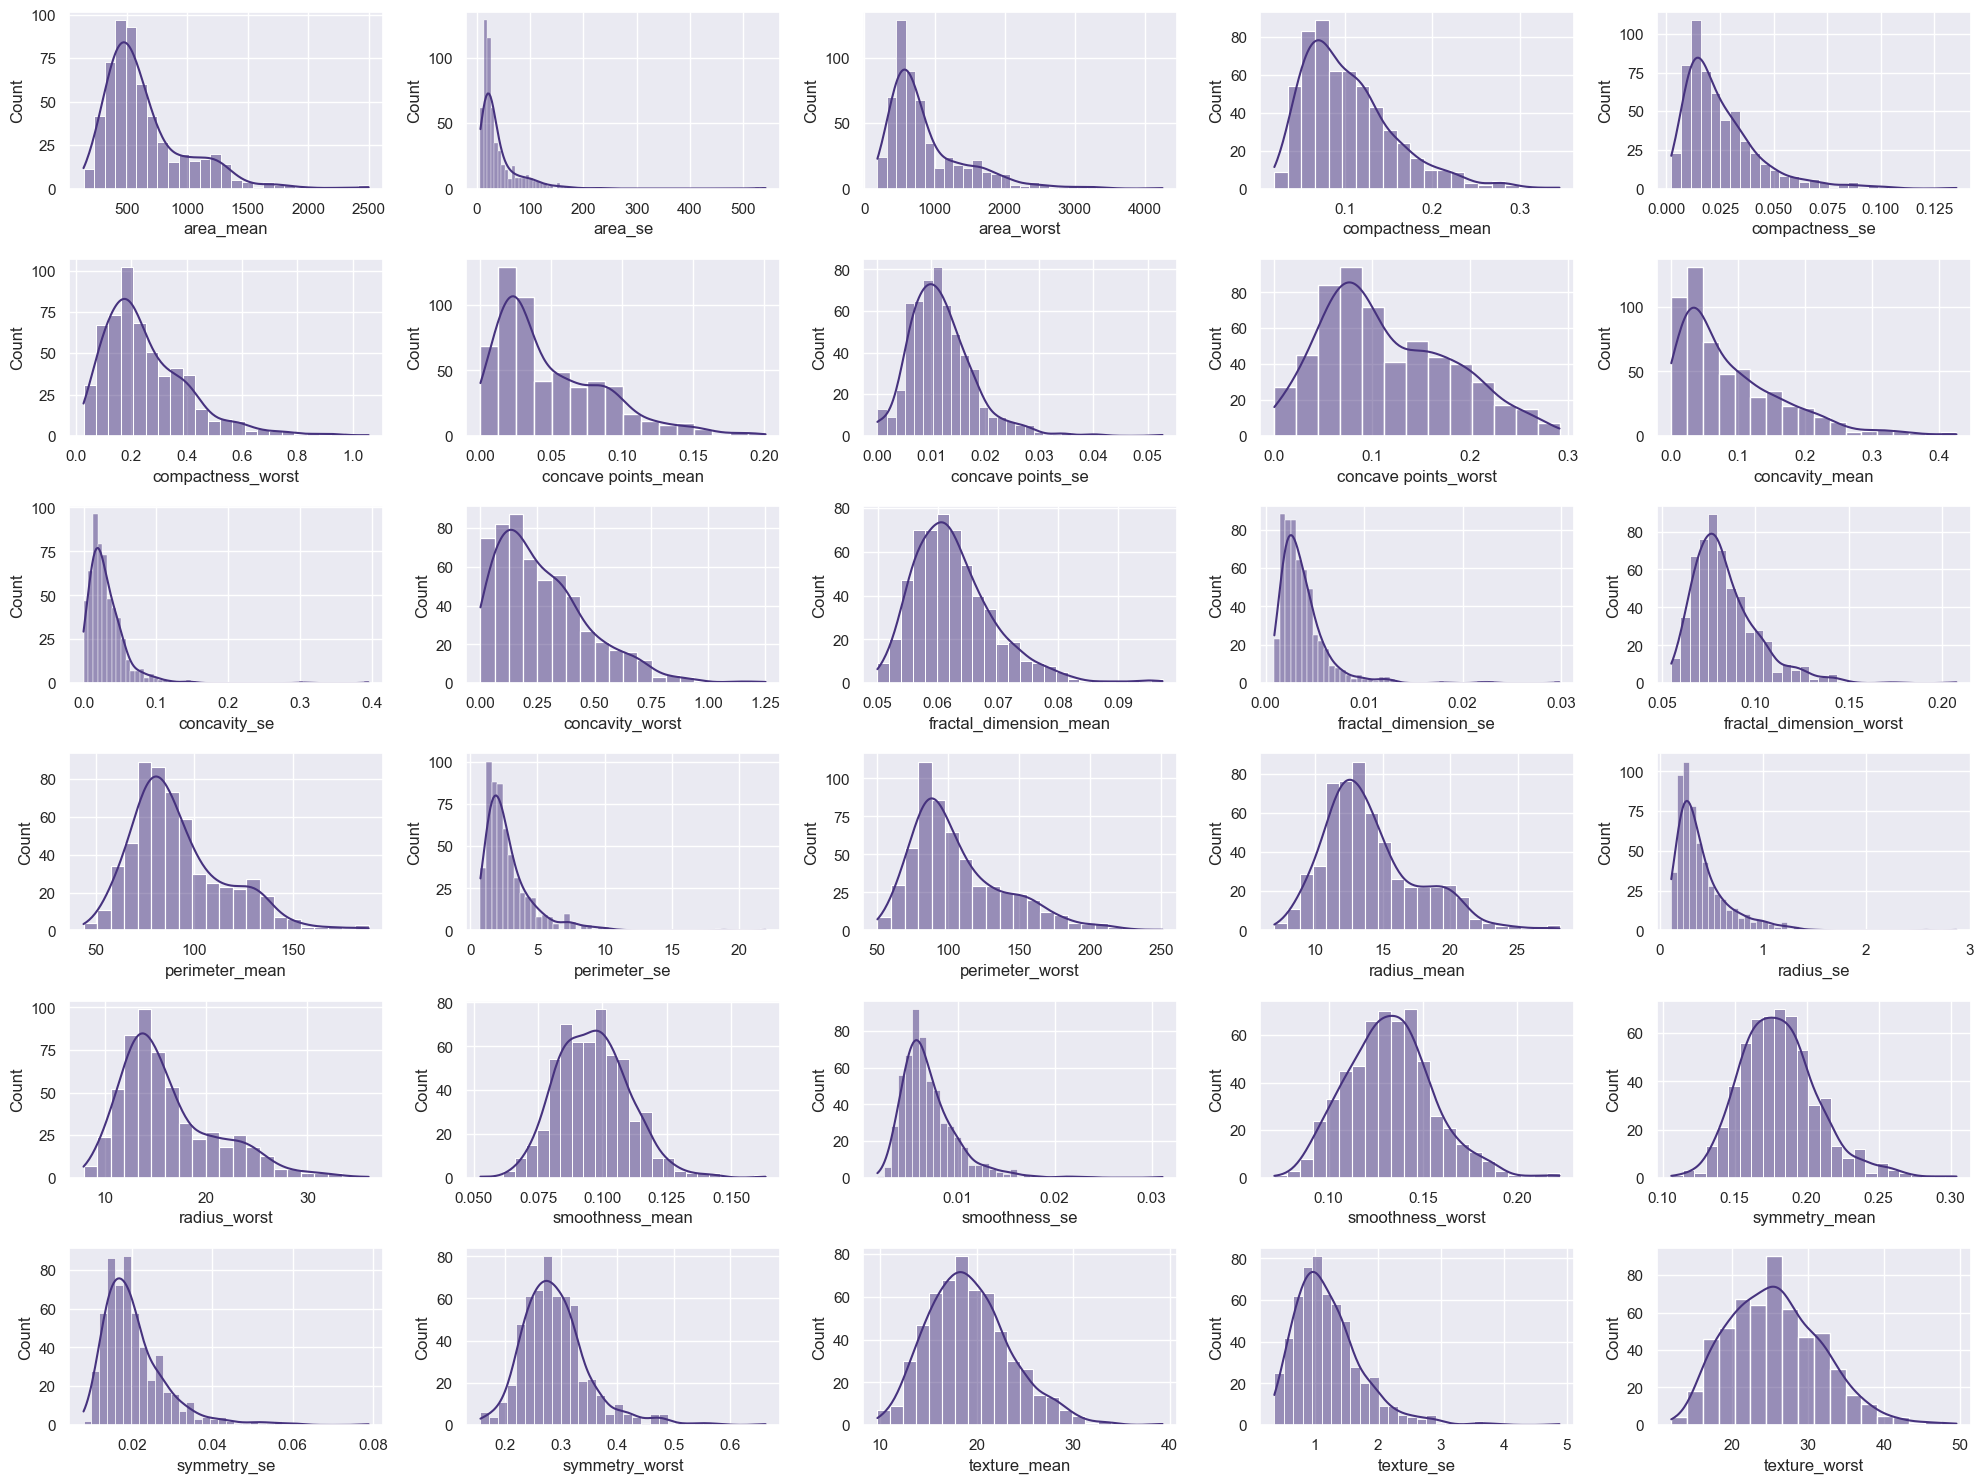

In [12]:
fig, axs = plt.subplots(6, 5, figsize=(20, 15))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.histplot(x=coluna, ax=ax, data=df, kde=True)

plt.tight_layout()
plt.show()

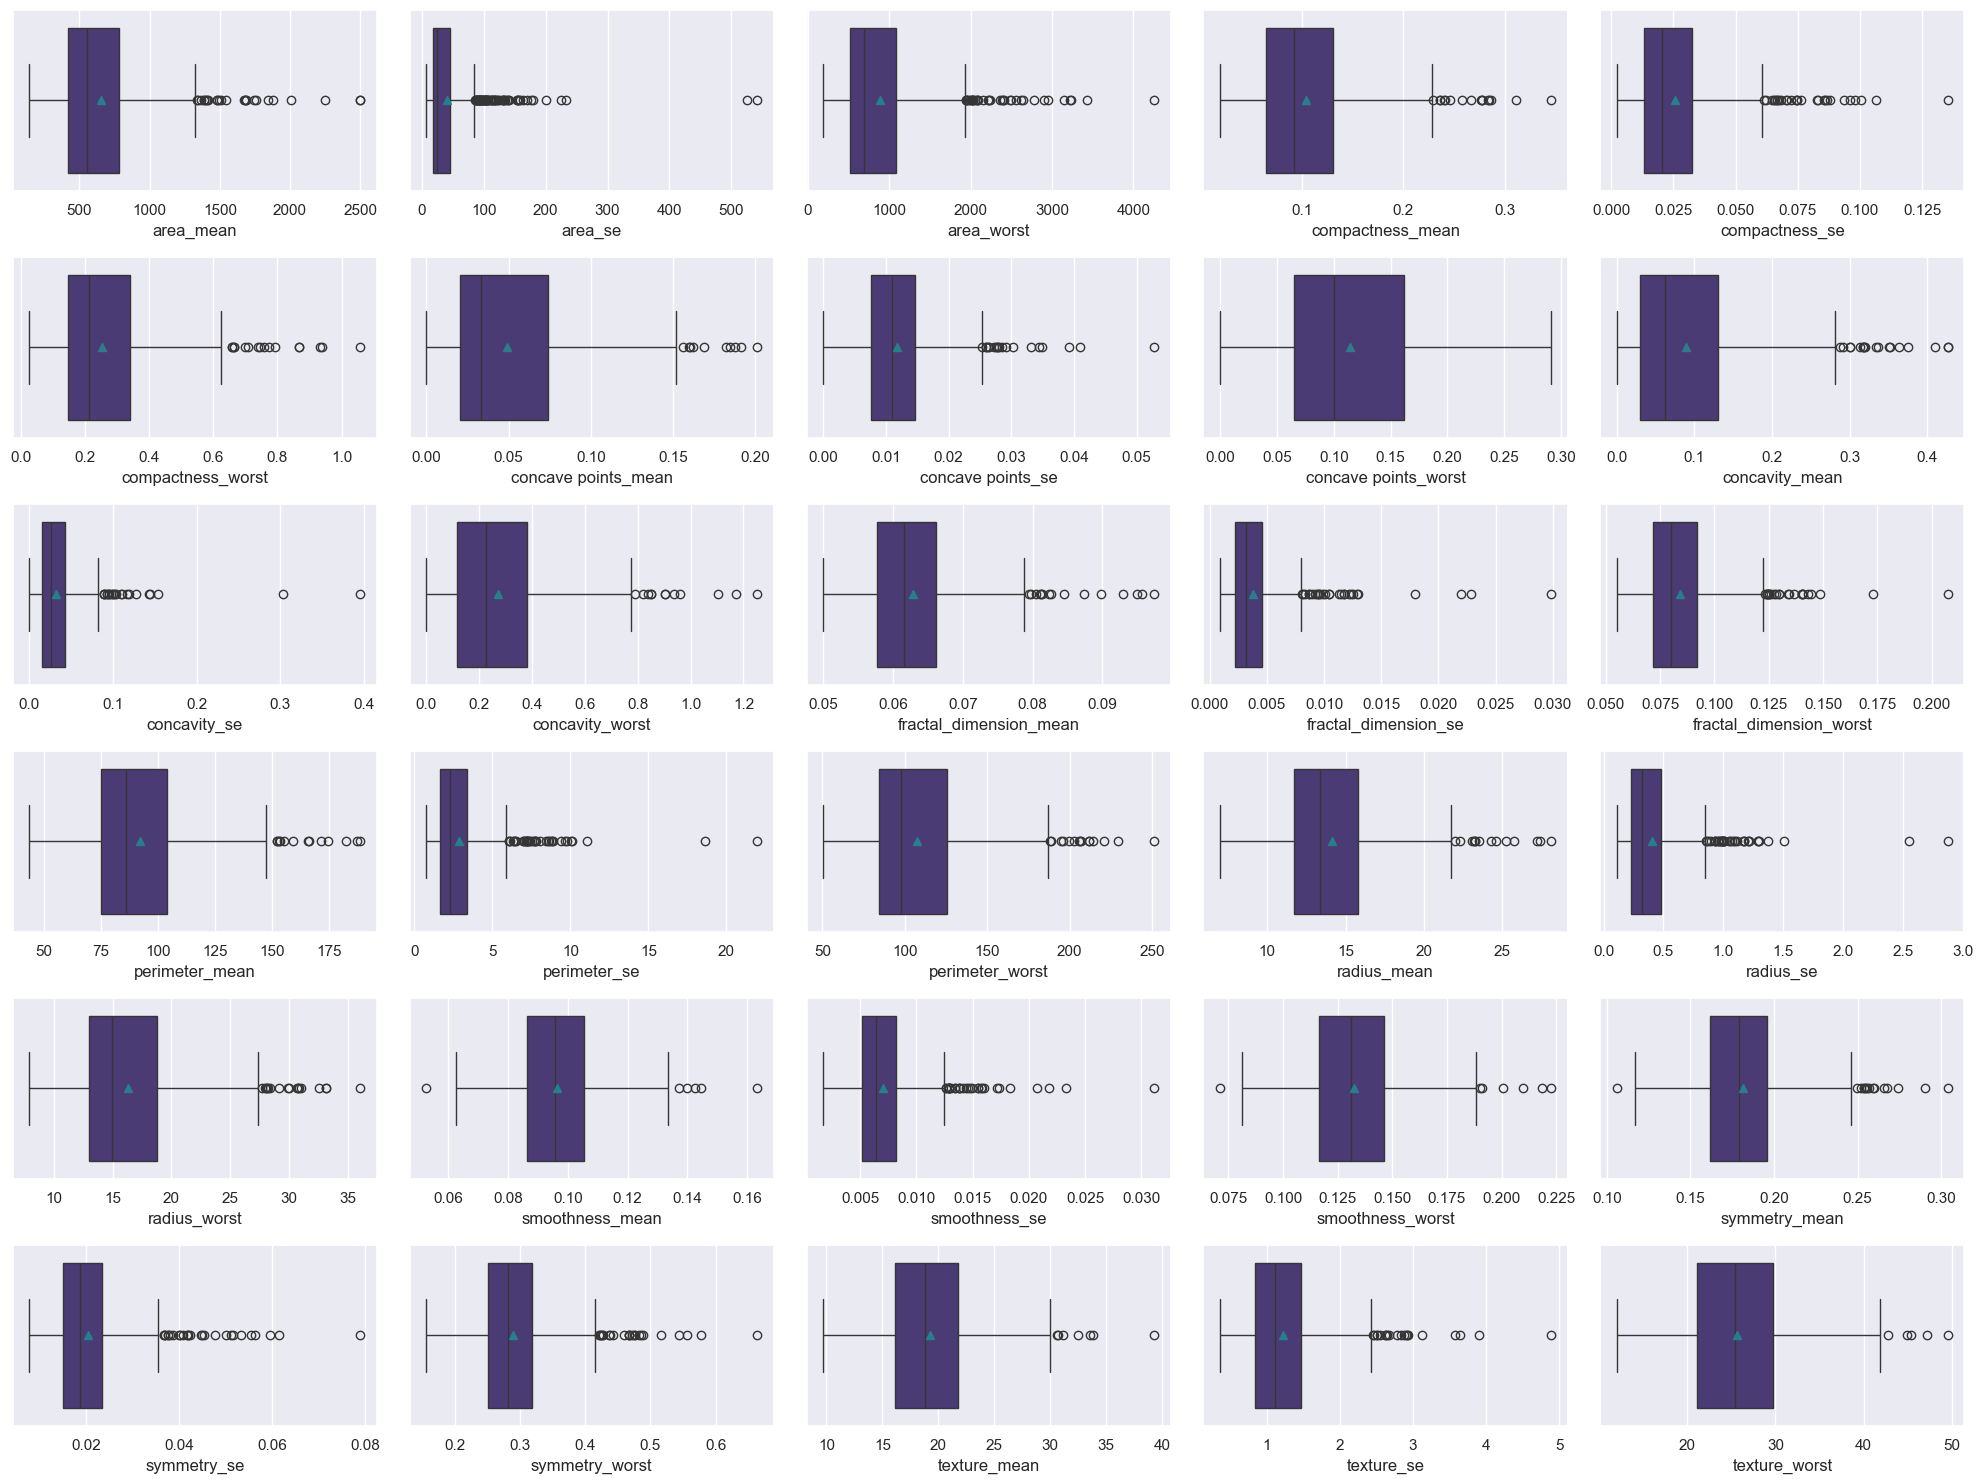

In [13]:
fig, axs = plt.subplots(6, 5, figsize=(20, 15))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.boxplot(x=coluna, ax=ax, data=df, showmeans=True)

plt.tight_layout()
plt.show()

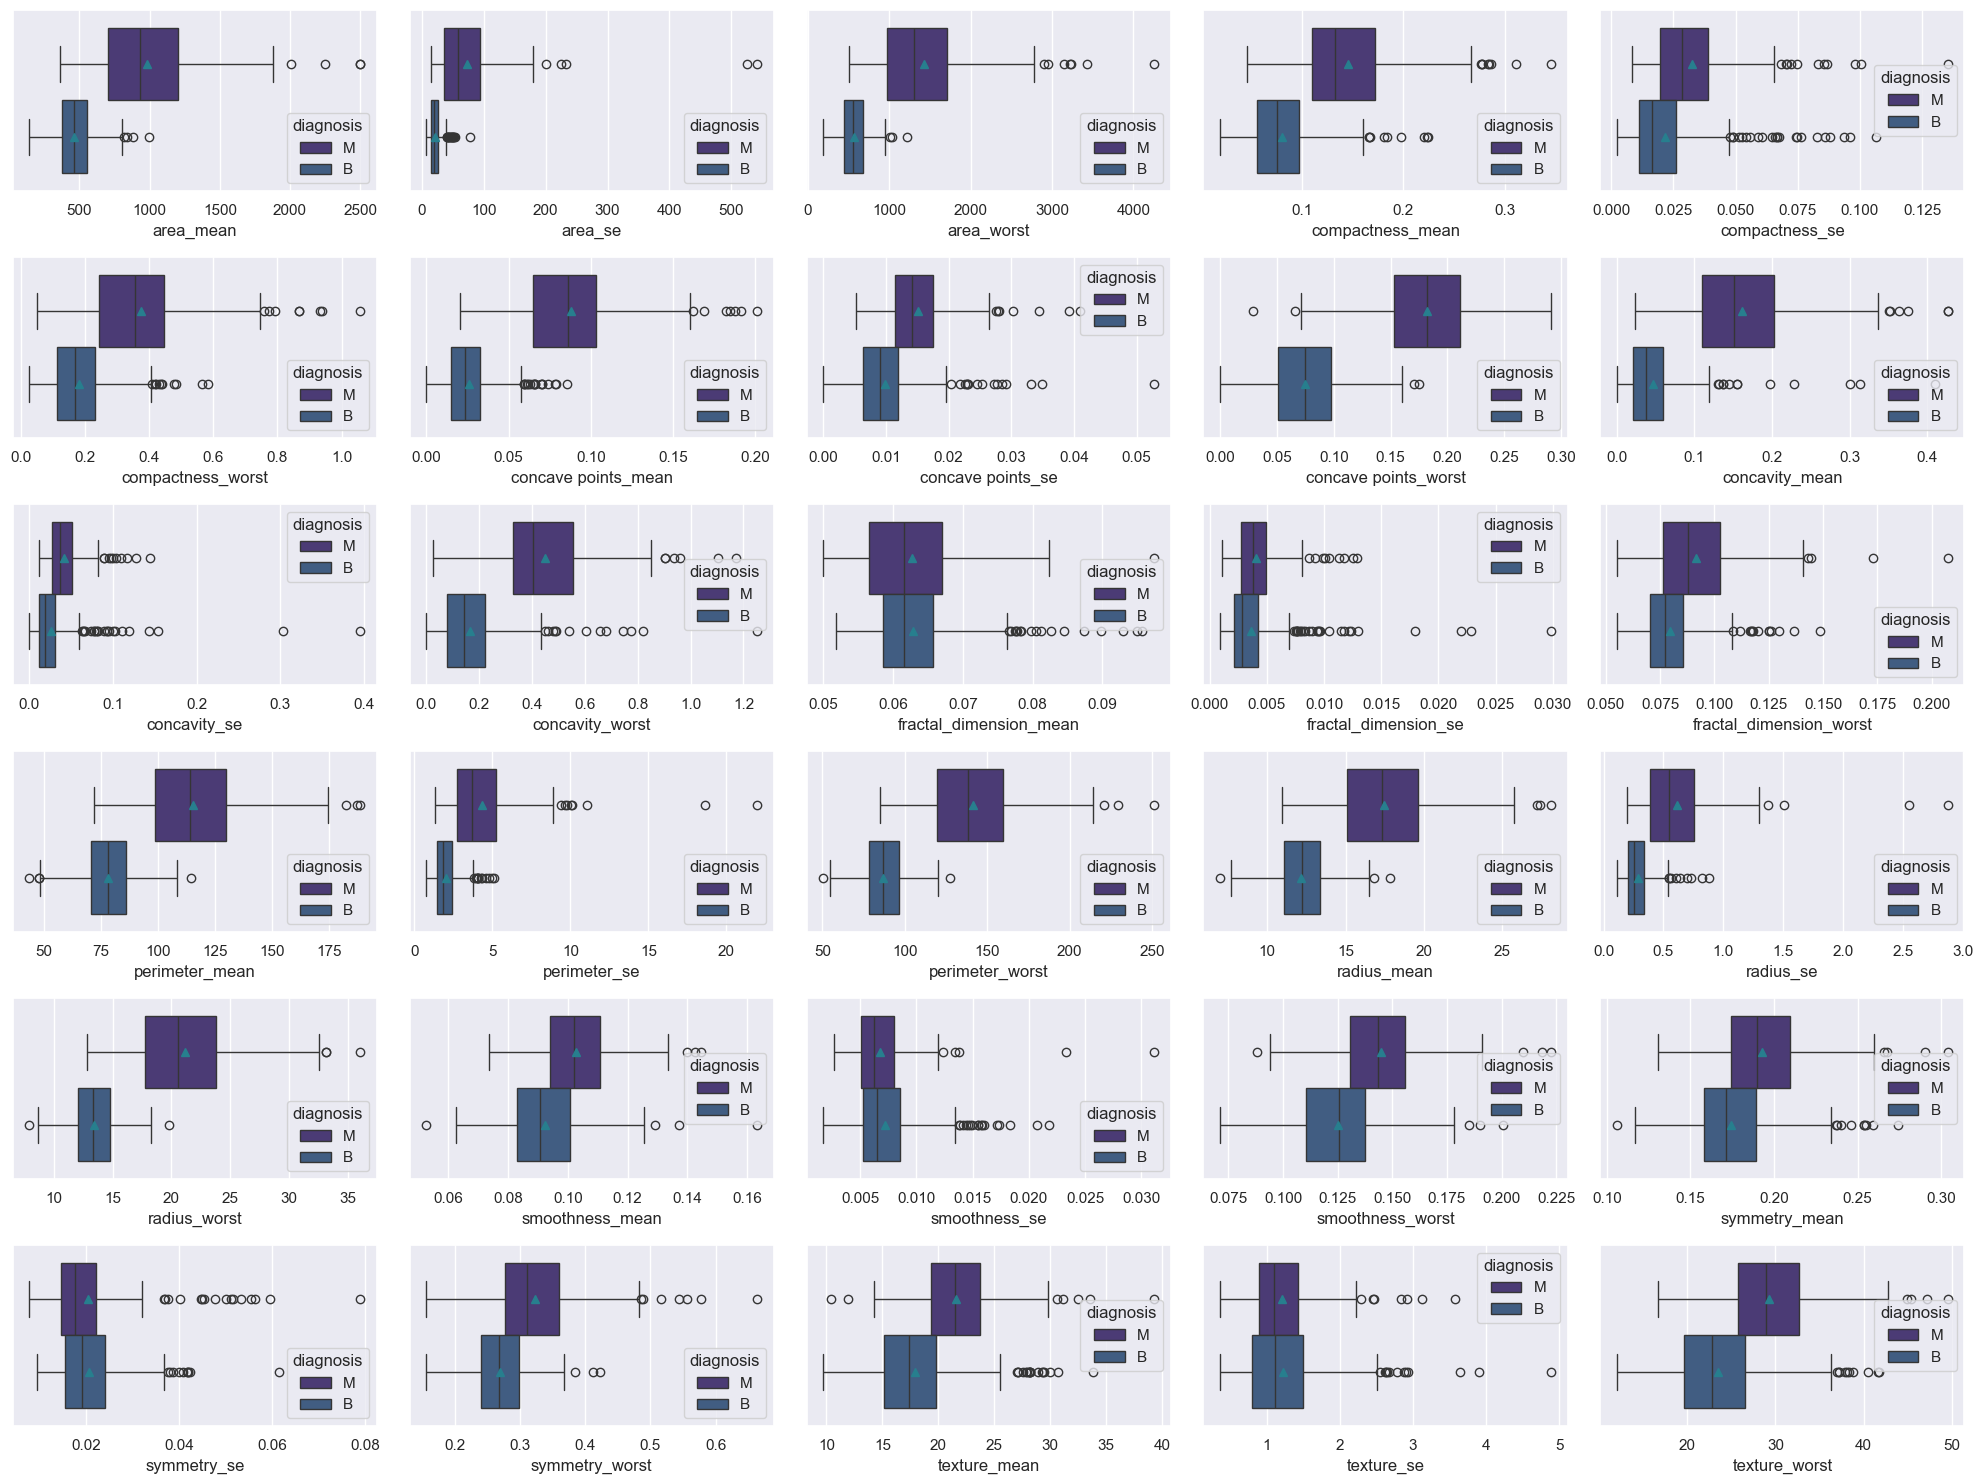

In [14]:
#comparar features em relação a coluna target
fig, axs = plt.subplots(6, 5, figsize=(20, 15))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.boxplot(x=coluna, ax=ax, data=df, showmeans=True, hue="diagnosis")

plt.tight_layout()
plt.show()

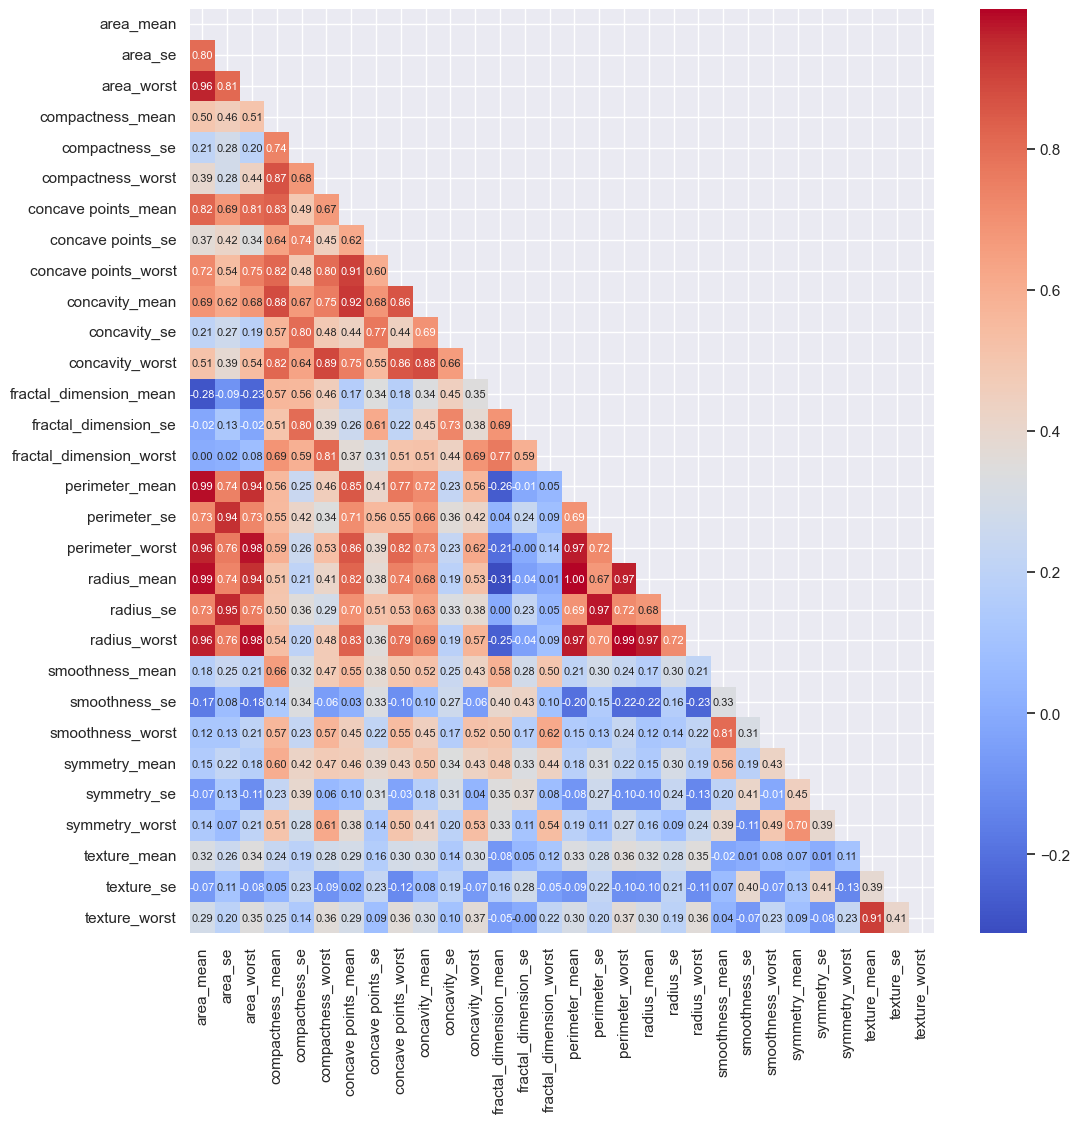

In [15]:
#analisar correlação entre as colunas
matriz = np.triu(df.select_dtypes("number").corr())

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(
    df.select_dtypes("number").corr(),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE,
    annot_kws={"fontsize": 8}
)

plt.show()

In [16]:
#comparativo testes Mann-Whitney U e T de Stdent
colunas_numericas = df.select_dtypes("number").columns.to_list()

analise_colunas_ttest = {}
analise_colunas_mw = {}

coluna_target = "diagnosis"

In [17]:
classes = df[coluna_target].unique()
classes

array(['M', 'B'], dtype=object)

In [18]:
alfa = 0.05

In [19]:
df.groupby(coluna_target).get_group(classes[1])["area_worst"]

19    711.20
20    630.50
21    314.90
37    545.90
46    242.20
       ...  
558   733.50
559   474.20
560   706.70
561   439.60
568   268.60
Name: area_worst, Length: 357, dtype: float64

In [20]:
agrupamento = df.groupby(coluna_target)

agrupamento

In [21]:
for coluna in colunas_numericas:
    grupo1 = agrupamento.get_group(classes[0])[coluna]
    grupo2 = agrupamento.get_group(classes[1])[coluna]

    estatistica_t, pvalue_t = ttest_ind(grupo1, grupo2)

    analise_colunas_ttest[coluna] = {
        "pvalue": pvalue_t,
        "estatistica": estatistica_t,
        "relacao_significativa": pvalue_t < alfa,
    }
    
    estatistica_mw, pvalue_mw = mannwhitneyu(grupo1, grupo2)

    analise_colunas_mw[coluna] = {
        "pvalue": pvalue_mw,
        "estatistica": estatistica_mw,
        "relacao_significativa": pvalue_mw < alfa,
    }

NameError: name 'ttest_ind' is not defined

In [ ]:
df_analise_colunas_ttest = pd.DataFrame(analise_colunas_ttest).T
df_analise_colunas_ttest

In [ ]:
df_analise_colunas_ttest[
   df_analise_colunas_ttest["relacao_significativa"] == False
]

In [ ]:
df_analise_colunas_mw = pd.DataFrame(analise_colunas_mw).T
df_analise_colunas_mw

In [ ]:
df_analise_colunas_mw[
   df_analise_colunas_mw["relacao_significativa"] == False
]

In [ ]:
df.info()

In [ ]:
profile= ProfileReport(df)
profile.to_file(RELATORIO)

In [ ]:
df.to_parquet(DADOS_LIMPOS, index=False)

### Conclusão

Conclusão da Análise Exploratória (EDA)

Distribuição dos Dados:

Os histogramas revelaram assimetria significativa na maioria das variáveis.

Boxplots confirmaram a presença generalizada de outliers nos dados.

Relação com a Variável Target:

A visualização por hue nos boxplots demonstrou padrões distintos entre as classes (benigno/maligno).

Correlações altas (>0.8) entre variáveis morfológicas (área, perímetro, raio) foram identificadas, como esperado biologicamente.

Testes Estatísticos:

Tanto o teste T de Student quanto Mann-Whitney U corroboraram diferenças significativas (p < 0.05) entre as classes para todas as variáveis numéricas.

Essa convergência de resultados valida as observações visuais dos gráficos.

Insight: A combinação de técnicas visuais (histogramas, boxplots, matriz de correlação) e testes estatísticos proporcionou uma compreensão robusta da estrutura dos dados e sua relação com o diagnóstico.


### Conclusion

Exploratory Data Analysis (EDA) Conclusion

Data Distribution:

Histograms revealed significant skewness in most variables.

Boxplots confirmed widespread presence of outliers.

Relationship with Target Variable:

Hue-stratified boxplots showed distinct patterns between classes (benign/malignant).

High correlations (>0.8) among morphological variables (area, perimeter, radius) were identified, as biologically expected.

Statistical Tests:

Both Student’s T-test and Mann-Whitney U confirmed significant differences (p < 0.05) between classes for all numerical variables.

This convergence validates the visual observations from plots.

Key Insight: The synergy between visual techniques (histograms, boxplots, correlation matrix) and statistical tests provided a robust understanding of data structure and its relationship with diagnosis.